# Mod17 Matploblib Plots

In [4]:
import numpy as np
import pandas as pd

In [6]:
np.__version__

'1.19.1'

In [7]:
pd.__version__

'1.0.5'

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [22]:
%matplotlib inline
#%matplotlib notebook

### Line plot

In [24]:
pd.date_range('1/1/2000', periods=1000)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [25]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))

In [26]:
ts

2000-01-01    0.469112
2000-01-02   -0.282863
2000-01-03   -1.509059
2000-01-04   -1.135632
2000-01-05    1.212112
                ...   
2002-09-22   -1.512743
2002-09-23    0.933753
2002-09-24   -0.308013
2002-09-25   -0.079915
2002-09-26   -1.010589
Freq: D, Length: 1000, dtype: float64

In [27]:
ts = ts.cumsum()  # 累計加總

In [28]:
ts.head(5)

2000-01-01    0.469112
2000-01-02    0.186249
2000-01-03   -1.322810
2000-01-04   -2.458442
2000-01-05   -1.246330
Freq: D, dtype: float64

<AxesSubplot:>

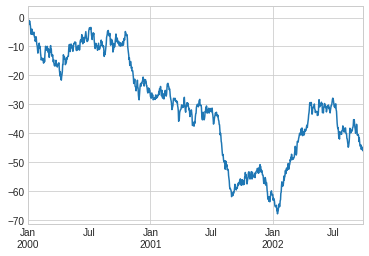

In [29]:
ts.plot.line()    # Series內有多種不同的繪圖功能 沒有分號, 可以隱藏 物件標籤

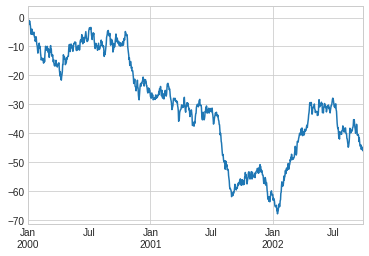

In [30]:
ts.plot.line();    # Series內有多種不同的繪圖功能

In [31]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [32]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


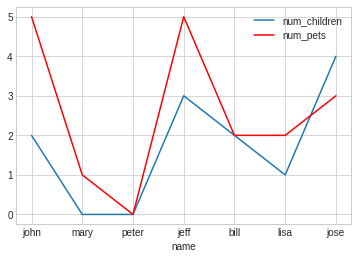

In [35]:
# gca stands for 'get current axes'  取得現在的繪圖物件
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red',ax=ax)

plt.show()

### Bar plot

In [36]:
rng = np.random.RandomState(42)
df2 = pd.DataFrame(rng.randint(0,20, (5,4)), columns=['a', 'b', 'c', 'd'], 
                   index=['2001','2002','2003','2004','2005'])

In [37]:
df2.head(5)

,a,b,c,d
2001,6,19,14,10
2002,7,6,18,10
2003,10,3,7,2
2004,1,11,5,1
2005,0,11,11,16


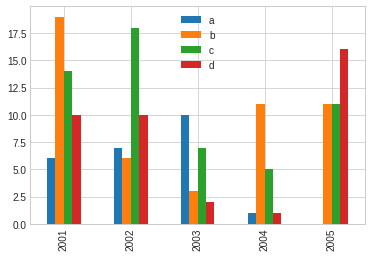

In [38]:
df2.plot.bar();

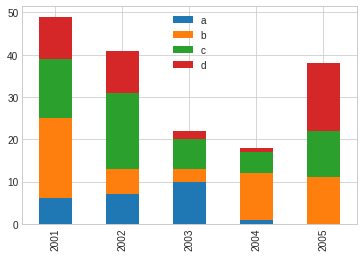

In [39]:
df2.plot.bar(stacked=True);

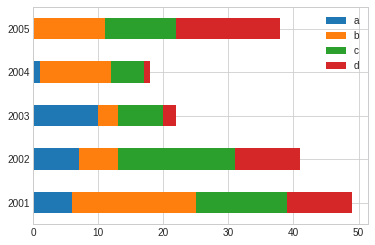

In [40]:
df2.plot.barh(stacked=True);    # 水平堆疊

In [50]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


In [49]:
df3 = df.groupby('state')['name'].nunique()  

In [42]:
df3.head()

state
california    3
dc            2
texas         2
Name: name, dtype: int64

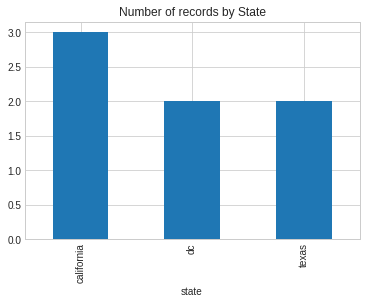

In [43]:
# add title
plt.title('Number of records by State')

df3.plot(kind='bar');

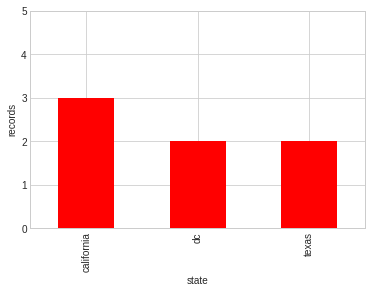

In [53]:
# add y-axis label
plt.ylabel('records')
plt.ylim(0,5)

df3.plot(kind='bar', color='red');

### Pie plot

In [54]:
np.random.seed(123456)
ss = pd.Series(3 * np.random.rand(4),
                    index=['a', 'b', 'c', 'd'], name='series')

In [55]:
ss.head()

a    0.380909
b    2.900154
c    0.781428
d    2.691710
Name: series, dtype: float64

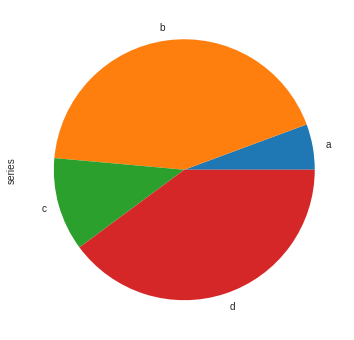

In [58]:
ss.plot.pie(figsize=(6, 6));

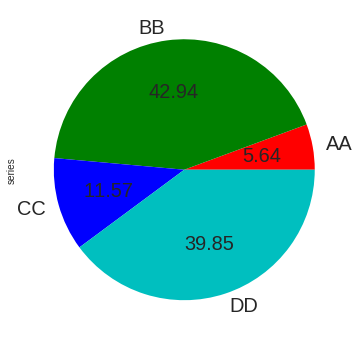

In [61]:
ss.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],  # k 黑, r紅, g綠, b藍, y黃, m紫,  c水, w白
                   autopct='%.2f', fontsize=20, figsize=(6, 6));

In [62]:
raw_data = {'class_name': ['AIEN', 'BDSE', 'AIOT', 'SESE'],
        'Q1': [28, 24, 32, 18],
        'Q2': [25, 36, 20, 16],
        'Q3': [30, 34, 25, 23]}
cdf = pd.DataFrame(raw_data)
cdf

,class_name,Q1,Q2,Q3
0,AIEN,28,25,30
1,BDSE,24,36,34
2,AIOT,32,20,25
3,SESE,18,16,23


In [63]:
# Create a column with the total amount for each class
cdf['amt'] = cdf['Q1'] + cdf['Q2'] + cdf['Q3']
cdf[['class_name','amt']]

,class_name,amt
0,AIEN,83
1,BDSE,94
2,AIOT,77
3,SESE,57


In [68]:
# Create a column with the total amount for each class
cdf['amt'] = cdf['Q1'] + cdf['Q2'] + cdf['Q3']
cdf.iloc[:,::4]

,class_name,amt
0,AIEN,83
1,BDSE,94
2,AIOT,77
3,SESE,57


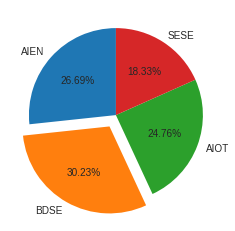

In [75]:
# Create pie chart
plt.pie(
    # using amt data
    cdf['amt'],
    # with the class name labels 
    labels=cdf['class_name'],
    # with one slide exploded out
    explode=(0, 0.15, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%.2f%%'
    );

### Matplotlib Help

In [ ]:
plt.pie?

## Lab

<b>有一個 DataFrame 如下</b>

In [ ]:
np.random.seed(70)
data = pd.DataFrame(np.random.randint(50, size=(6, 4)),
        index=['one', 'two', 'three', 'four', 'five', 'six'],
        columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
data

<b>利用 'A'、'C' 兩欄的資料繪製線型圖</b>

<b>利用 'B'、'C'、'D' 三欄的資料做水平直條圖</b>

<b>使用 'C' 欄資料建立圓餅圖，不要顯示 Y 軸標題，顯示圖表標題 "C data"，顯示各區塊的百分比</b>